<a href="https://colab.research.google.com/github/agungfradiansyah12/MesingLearning/blob/main/jb7MesinLearningRegresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

## Langkah 1: Persiapan Data

## Langkah 2: Import Library

In [69]:
# import package
import numpy as np
import pandas as pd

## Langkah 3: Baca Data

In [70]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

## Langkah 4: Pemahaman Terhadap Data

In [71]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Langkah 5: Visualisasi Data

###    Import library Matplotlib dan Seaborn untuk visualisasi data.

In [72]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

###    Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


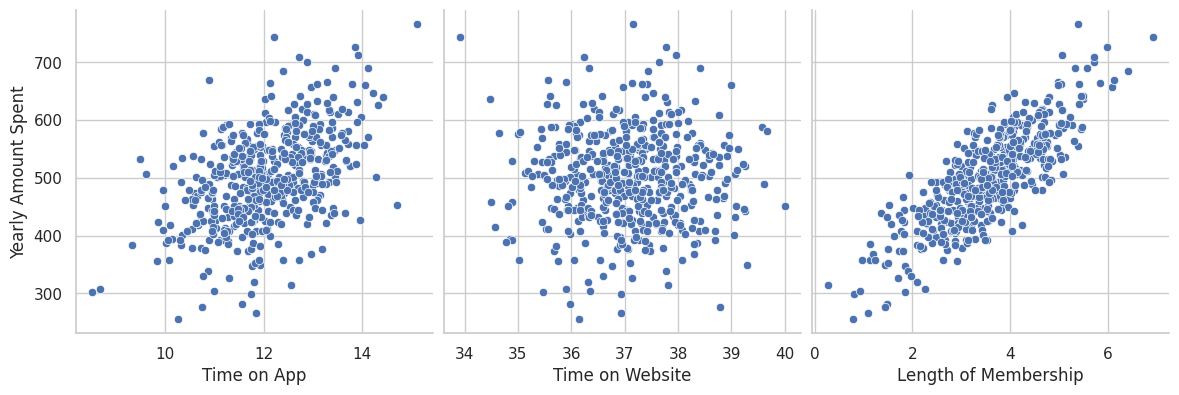

In [98]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

##    Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

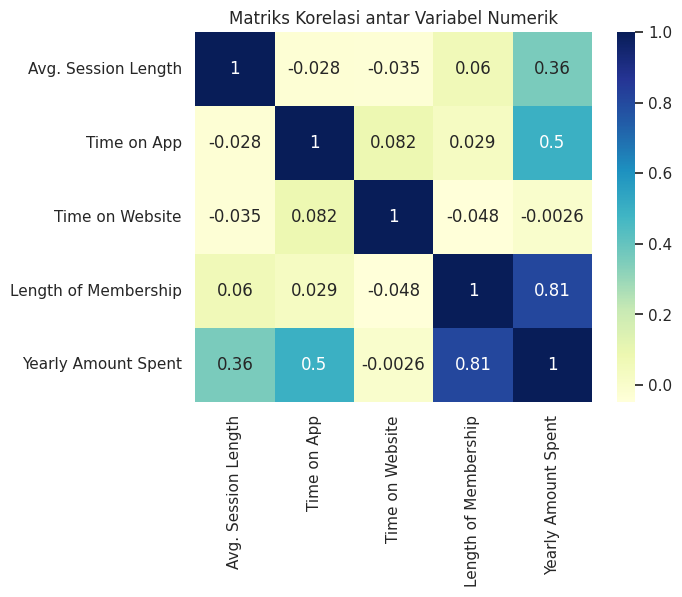

In [75]:
# pilih hanya kolom numerik agar tidak error
numeric_data = data.select_dtypes(include=['number'])

# buat heatmap korelasi antar variabel numerik
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)

# beri judul untuk memperjelas visualisasi
plt.title("Matriks Korelasi antar Variabel Numerik")
plt.show()

## Langkah 6: Regresi Linier

In [76]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

    Pisahkan variabel bebas (X) dan variabel target (y).

In [77]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

    Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

    Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [78]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

    Visualisasikan garis regresi pada data latih.

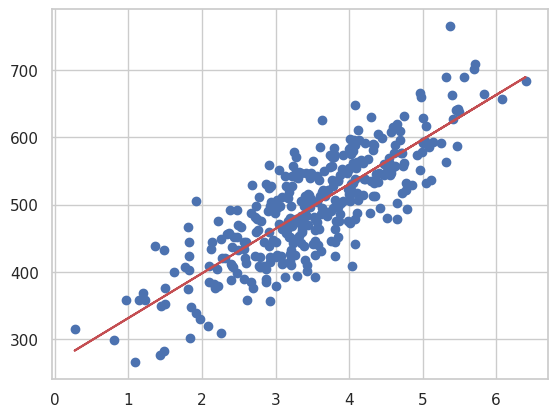

In [79]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

## Langkah 7: Analisis Residual

In [80]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

    Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

/tmp/ipython-input-594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


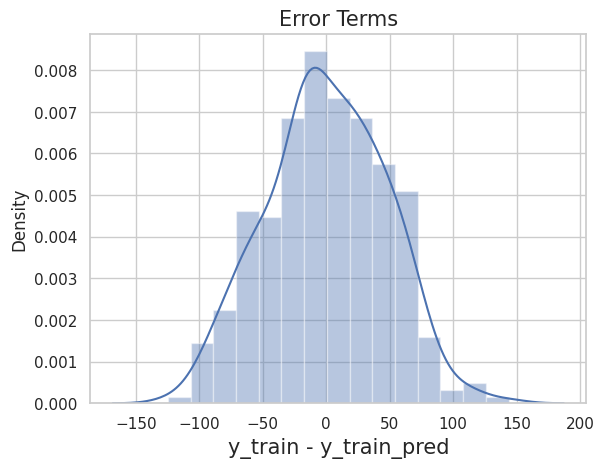

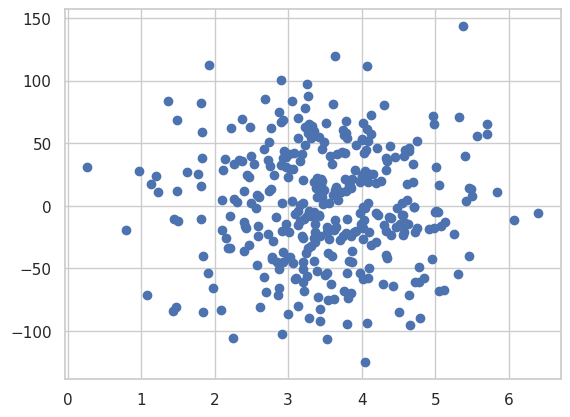

In [81]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

    Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

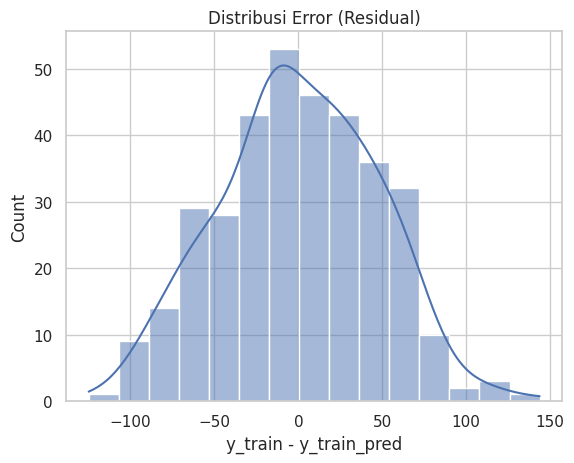

ValueError: x and y must be the same size

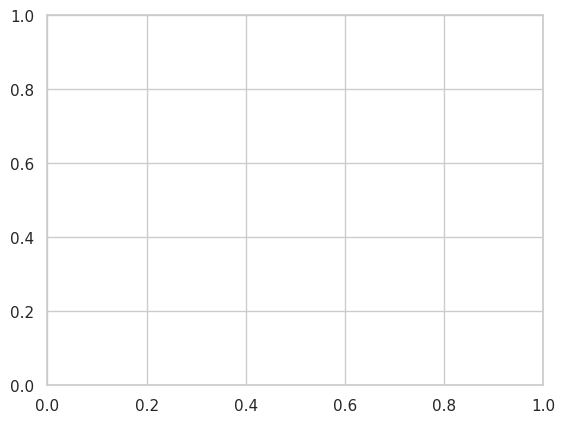

In [97]:
# Visualisasi residual dalam bentuk histogram
fig = plt.figure()
sns.histplot(res, bins=15, kde=True)
plt.title('Distribusi Error (Residual)')
plt.xlabel('y_train - y_train_pred')
plt.show()

# Visualisasi residual dalam bentuk scatter plot
plt.scatter(X_train, res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Length of Membership')
plt.ylabel('Residual')
plt.title('Scatter Plot Residual')
plt.show()


# **Praktikum2**

##    Mengimpor Library:

In [82]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##    Mengimpor Dataset:

In [83]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

##    Feature Scaling:

In [84]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

##    Fitting SVR ke Dataset:

In [85]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##    Visualisasi Hasil SVR:

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


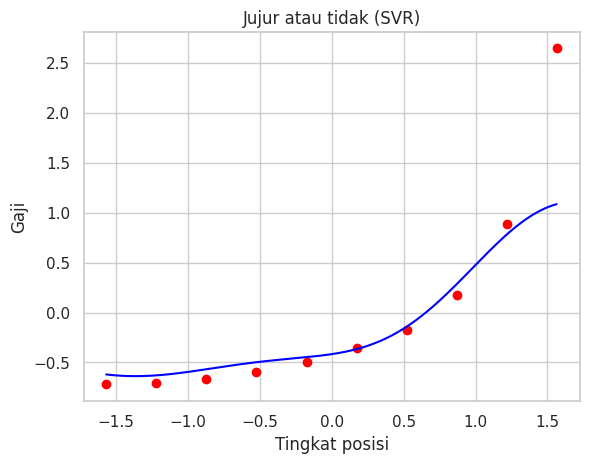

In [86]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

##    Prediksi Hasil:

In [87]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

##    Menampilkan Hasil:

In [88]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


##    Evaluasi Model SVR

In [89]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# **Tugas Praktikum**

## Langkah 1

In [90]:
# Import Library
import numpy as np                # untuk operasi numerik dan array
import pandas as pd               # untuk manipulasi data (membaca file CSV, analisis)
import matplotlib.pyplot as plt   # untuk visualisasi data (grafik)
import seaborn as sns             # untuk visualisasi data dengan style yang lebih menarik

from google.colab import files    # untuk upload file manual ke Colab

# Upload Dataset
# uploaded = files.upload()         # buka jendela upload dan pilih file 'insurance.csv'

# Membaca File CSV
df = pd.read_csv('insurance.csv') # membaca dataset dan menyimpannya ke variabel df

# Melihat Ukuran Dataset
print("Ukuran dataset:", df.shape)   # menampilkan jumlah baris dan kolom

# Melihat 5 Baris Pertama Data
print("\nLima data teratas:")
print(df.head())                    # menampilkan 5 baris pertama dataset

# Menampilkan Informasi Kolom
print("\nInformasi kolom:")
print(df.info())                    # menampilkan tipe data dan jumlah nilai non-null

# Menampilkan Statistik Deskriptif
print("\nStatistik deskriptif:")
print(df.describe())                # menampilkan ringkasan statistik data numerik

Ukuran dataset: (1338, 7)

Lima data teratas:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Statistik deskriptif:
    

**Analasis Output**

dataset insurance.csv memiliki ukuran 1338 baris dan 7 kolom, yang berarti terdapat 1338 data pasien dengan tujuh variabel yang menjelaskan karakteristik dan biaya asuransi mereka. Berdasarkan tampilan lima data teratas, dapat diketahui bahwa setiap baris mewakili satu pasien dengan atribut seperti usia (age), jenis kelamin (sex), indeks massa tubuh (bmi), jumlah anak tanggungan (children), status perokok (smoker), wilayah domisili (region), dan biaya asuransi (charges). Variabel charges menjadi target yang biasanya digunakan untuk prediksi biaya asuransi berdasarkan faktor-faktor lain.

Dari informasi kolom, diketahui bahwa dataset tidak memiliki nilai kosong (semua kolom memiliki 1338 nilai non-null). Tipe datanya terdiri dari dua kolom numerik bertipe int64 (age, children), dua kolom numerik bertipe float64 (bmi, charges), serta tiga kolom kategorikal bertipe object (sex, smoker, region). Hal ini menunjukkan bahwa dataset sudah cukup bersih dan tidak memerlukan penanganan missing value.

Sementara itu, hasil statistik deskriptif memperlihatkan bahwa rata-rata usia pasien adalah sekitar 39 tahun, rata-rata BMI sekitar 30,66, jumlah anak rata-rata 1 orang, dan rata-rata biaya asuransi sebesar 13.270. Nilai standar deviasi biaya asuransi yang cukup besar (±12.110) mengindikasikan adanya variasi yang tinggi antar pasien, kemungkinan dipengaruhi oleh faktor seperti kebiasaan merokok, usia, atau BMI.

## Deskripsi Variabel & Korelasi


Deskripsi Variabel:
- age       : Usia nasabah (numeric)
- sex       : Jenis kelamin (male/female)
- bmi       : Body Mass Index
- children  : Jumlah tanggungan
- smoker    : Status perokok (yes/no)
- region    : Wilayah tempat tinggal (northeast, northwest, southeast, southwest)
- charges   : Biaya medis (target)



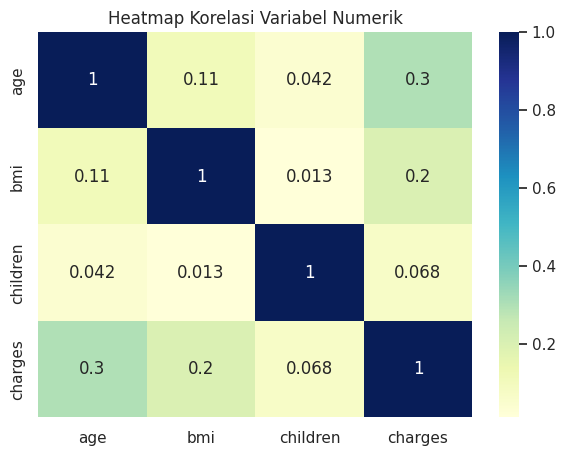

In [91]:
# Menampilkan deskripsi tiap kolom
print("""
Deskripsi Variabel:
- age       : Usia nasabah (numeric)
- sex       : Jenis kelamin (male/female)
- bmi       : Body Mass Index
- children  : Jumlah tanggungan
- smoker    : Status perokok (yes/no)
- region    : Wilayah tempat tinggal (northeast, northwest, southeast, southwest)
- charges   : Biaya medis (target)
""")

# Visualisasi korelasi antar variabel numerik menggunakan heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


Berdasarkan hasil deskripsi variabel dan heatmap korelasi, dataset insurance.csv berisi faktor-faktor yang bisa memengaruhi biaya medis seseorang, seperti usia (age), indeks massa tubuh (bmi), jumlah anak (children), jenis kelamin (sex), status perokok (smoker), dan wilayah tempat tinggal (region). Variabel yang jadi fokus utama atau targetnya adalah charges, yaitu total biaya medis yang harus dibayar oleh tiap individu.

Dari hasil korelasi bisa dilihat kalau age punya hubungan paling kuat dengan charges sebesar 0.3, lalu bmi sebesar 0.2, sedangkan children korelasinya kecil banget, cuma 0.068. Hal ini berarti biaya medis cenderung meningkat seiring bertambahnya usia dan indeks massa tubuh, sedangkan jumlah anak tidak terlalu berpengaruh. Korelasi antarvariabel lainnya juga rendah, menandakan masing-masing variabel relatif independen satu sama lain.


## Pra-pemrosesan Data (Encoding & Split)

In [92]:

# drop_first=True artinya kolom pertama dihapus untuk menghindari dummy trap
X = pd.get_dummies(df.drop(columns=['charges']), drop_first=True)

# Kolom 'charges' adalah variabel target
y = df['charges']

# Menampilkan kolom hasil encoding
print("\nKolom setelah encoding:")
print(X.columns)



Kolom setelah encoding:
Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


## Split Data (Training & Testing)

In [93]:
from sklearn.model_selection import train_test_split  # import fungsi split data

# Membagi dataset 70% untuk training dan 30% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    train_size=0.7,
                                                    random_state=42)

# Menampilkan ukuran data hasil split
print("\nData latih:", X_train.shape)
print("Data uji   :", X_test.shape)



Data latih: (936, 8)
Data uji   : (402, 8)


## Melatih Model Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression   # import model regresi linear

# Membuat objek model regresi
model = LinearRegression()

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Menampilkan koefisien regresi tiap fitur
coef = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_
}).sort_values(by='Koefisien', key=abs, ascending=False)

print("\nKoefisien Regresi Terbesar:")
print(coef.head(10))



Koefisien Regresi Terbesar:
              Fitur     Koefisien
4        smoker_yes  23628.367222
6  region_southeast   -970.968839
7  region_southwest   -926.322908
5  region_northwest   -486.934610
2          children    424.119128
1               bmi    348.906915
0               age    261.296924
3          sex_male    104.811823


**analisis**

proses pembagian dataset telah dilakukan menggunakan fungsi train_test_split dari Scikit-Learn. Dataset dibagi menjadi dua bagian, yaitu data latih (training set) sebanyak 70% dan data uji (testing set) sebanyak 30% dari total data. Dari hasil pembagian, didapatkan bahwa data latih berjumlah 936 baris dan 8 kolom, sedangkan data uji berjumlah 402 baris dan 8 kolom.

Pembagian ini bertujuan untuk memastikan model dapat belajar pola dari data latih dan kemudian dievaluasi performanya pada data uji yang belum pernah dilihat sebelumnya. Proporsi 70:30 sudah umum digunakan karena memberikan cukup banyak data untuk pelatihan sambil menyisakan bagian yang cukup untuk pengujian. Nilai random_state=42 digunakan agar pembagian data bersifat reproducible, artinya hasilnya akan tetap sama jika kode dijalankan kembali

## Prediksi dan Evaluasi Model

In [95]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Menggunakan model untuk memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
r2 = r2_score(y_test, y_pred)                  # koefisien determinasi (R^2)
mse = mean_squared_error(y_test, y_pred)       # mean squared error
rmse = np.sqrt(mse)                            # root mean squared error
mae = mean_absolute_error(y_test, y_pred)      # mean absolute error

# Menampilkan hasil evaluasi
print("\n=== Hasil Evaluasi Model ===")
print(f"R-squared : {r2:.4f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"MAE       : {mae:.2f}")



=== Hasil Evaluasi Model ===
R-squared : 0.7696
MSE       : 33780509.57
RMSE      : 5812.10
MAE       : 4145.45


**Analsisi**

diperoleh nilai R-squared sebesar 0.7696, yang berarti model mampu menjelaskan sekitar 76,96% variasi data target (biaya medis) berdasarkan variabel-variabel independen yang digunakan. Nilai ini tergolong cukup baik untuk model regresi, karena menunjukkan bahwa model memiliki kemampuan prediksi yang kuat dan hanya sekitar 23% variasi data yang belum dapat dijelaskan oleh model.

Nilai MSE (Mean Squared Error) sebesar 33.785.099.57, RMSE (Root Mean Squared Error) sebesar 5812.10, dan MAE (Mean Absolute Error) sebesar 4145.45 menunjukkan tingkat kesalahan prediksi dalam satuan yang sama dengan target (charges). Secara umum, semakin kecil nilai MSE, RMSE, dan MAE, maka semakin baik performa model. Dengan hasil ini, dapat disimpulkan bahwa model multiple linear regression telah memiliki performa yang cukup baik dalam memprediksi biaya medis pada dataset insurance.csv, meskipun masih terdapat ruang untuk peningkatan akurasi.

## Visualisasi Hasil

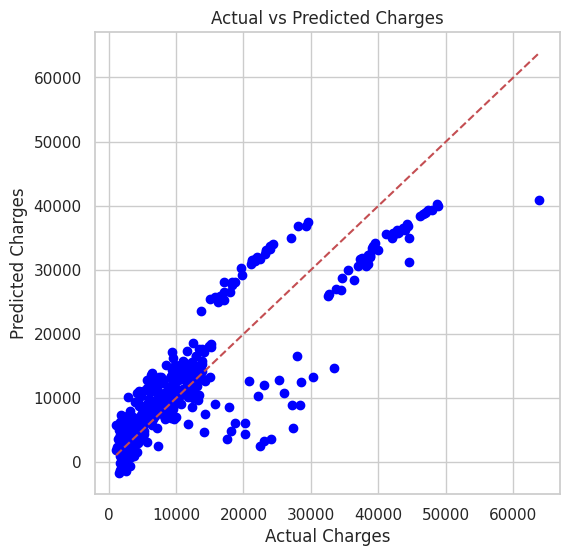

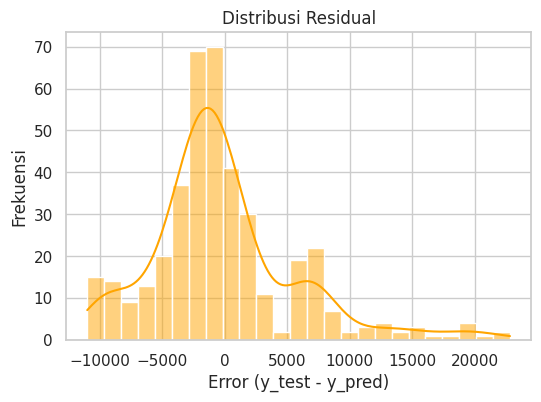

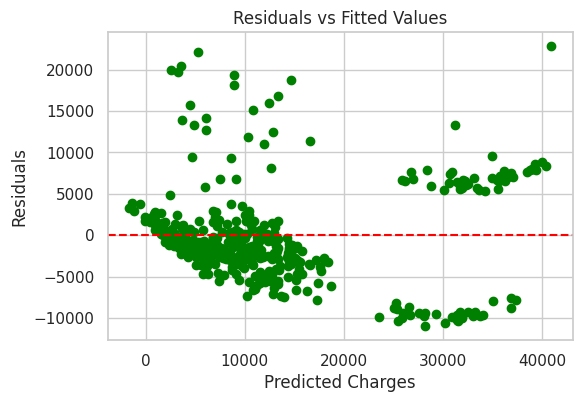

In [96]:
# Scatter Plot: Aktual vs Prediksi
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')   # titik antara nilai aktual & prediksi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis referensi
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

# Histogram Residual
residuals = y_test - y_pred  # selisih antara nilai aktual dan prediksi
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=25, kde=True, color='orange')
plt.title('Distribusi Residual')
plt.xlabel('Error (y_test - y_pred)')
plt.ylabel('Frekuensi')
plt.show()

# Residual vs Fitted
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='green')   # sebaran residual terhadap nilai prediksi
plt.axhline(0, linestyle='--', color='red')     # garis horizontal di 0
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


**Analisis**

Berdasarkan hasil visualisasi, grafik pertama (**Actual vs Predicted Charges**) menunjukkan hubungan antara nilai aktual dan nilai prediksi biaya medis. Titik-titik biru yang menyebar di sekitar garis merah putus-putus (garis ideal prediksi sempurna) memperlihatkan bahwa sebagian besar prediksi model mendekati nilai aktual, meskipun masih ada beberapa penyimpangan terutama pada nilai charges yang tinggi. Hal ini menunjukkan bahwa model sudah cukup baik dalam menangkap pola utama data, tetapi masih kurang akurat pada kasus dengan biaya medis ekstrem.

Sementara itu, grafik distribusi residual memperlihatkan bentuk yang mendekati distribusi normal dengan rata-rata error di sekitar nol, yang menandakan bahwa **model tidak memiliki bias signifikan** (tidak terlalu overestimate atau underestimate). Namun, dari plot **Residuals vs Fitted Values**, terlihat bahwa sebaran residual tidak sepenuhnya acak, ada pola tertentu pada nilai prediksi tinggi yang menunjukkan potensi **heteroskedastisitas** (variasi error tidak konstan). Artinya, model cenderung kurang stabil dalam memprediksi biaya medis tinggi, sehingga peningkatan model seperti menambahkan variabel non-linear atau transformasi fitur dapat membantu memperbaiki hasil prediksi.

## Kesimpulan

proses **eksplorasi dan pra-pemrosesan data (data preprocessing)** sangat penting untuk memastikan kualitas dan konsistensi data sebelum dilakukan analisis atau pemodelan. Pada tahap ini dilakukan pemeriksaan terhadap **tipe data, nilai hilang, outlier, serta distribusi data**, dan juga visualisasi seperti **heatmap korelasi** dan **scatter plot** untuk memahami hubungan antar variabel.
Dari hasil visualisasi tersebut, terlihat bahwa beberapa variabel memiliki **korelasi yang cukup kuat**, menunjukkan adanya hubungan yang signifikan antar fitur, sementara variabel lainnya memiliki korelasi lemah sehingga mungkin kurang berpengaruh dalam model.